In [34]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import SaltRemover
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
import molvs

from matplotlib import pyplot
from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
import seaborn
import pandas as pd
import random

In [3]:
zincsmi = [line.split(",")[1] for line in open("../data/zinc2015_0_vil_0_sa_to_6_ivan.csv")]
arlismi = [line.split(",")[0] for line in open("../data/ar_ligands.csv")]
x=zincsmi.pop(0)
x=arlismi.pop(0)

random.seed(156748)
random.shuffle(zincsmi)
random.shuffle(arlismi)

In [4]:
mols = [Chem.MolFromSmiles(mol) for mol in zincsmi[:1000] if Chem.MolFromSmiles(mol)]

for mol in arlismi[:100]:
    if Chem.MolFromSmiles(mol):
        mols.append(Chem.MolFromSmiles(mol))

In [5]:
lip_func = [Lipinski.NumHAcceptors, Lipinski.NumHDonors, Descriptors.ExactMolWt, Descriptors.MolLogP,
            rdMolDescriptors.CalcTPSA, Lipinski.NumRotatableBonds]

pch_data = [[f(mol) for f in lip_func] for mol in mols]

In [23]:
pch_frame = pd.DataFrame(pch_data, columns=["HBA","HBD","MW","LogP","TPSA","RB"])
pch_frame["active"] = [x > 999 for x,y in enumerate(pch_data)]

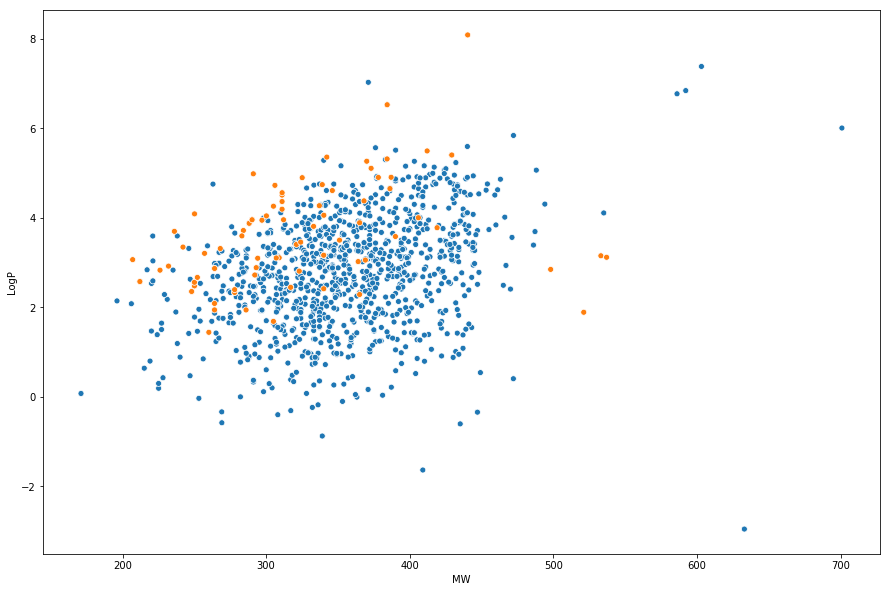

In [37]:
fig, ax = pyplot.subplots(figsize=(15,10))
p=seaborn.scatterplot(x="MW",y="LogP",data=pch_frame,hue="active",legend=False, ax=ax)

In [8]:
mqns = [rdMolDescriptors.MQNs_(mol) for mol in mols]

In [19]:
pca = decomposition.PCA(n_components=42)
pca.fit(mqns)
t_data = pca.transform(mqns)
t_frame = pd.DataFrame(t_data, columns=["pca%d"%(x+1,) for x in range(42)])
t_frame["active"] = [x > 999 for x,y in enumerate(mqns)]

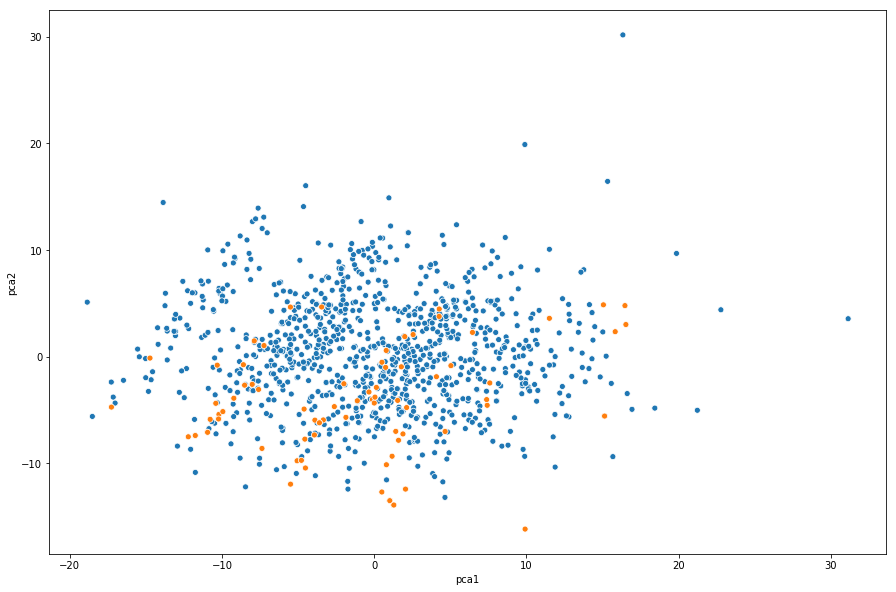

In [39]:
fig, ax = pyplot.subplots(figsize=(15,10))
p=seaborn.scatterplot(x="pca1",y="pca2",data=t_frame,hue="active",legend=False, ax=ax)

In [6]:
fps = [Chem.GetMorganFingerprintAsBitVect(m,2,nBits=1024) for m in mols]

sparse_mat = distance.pdist(fps,metric="jaccard")
dist_mat = distance.squareform(sparse_mat)

clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")
X_mds = clf.fit_transform(dist_mat)

In [32]:
mds_frame = pd.DataFrame(X_mds, columns=["x","y"])
mds_frame["active"] = [x > 999 for x,y in enumerate(X_mds)]

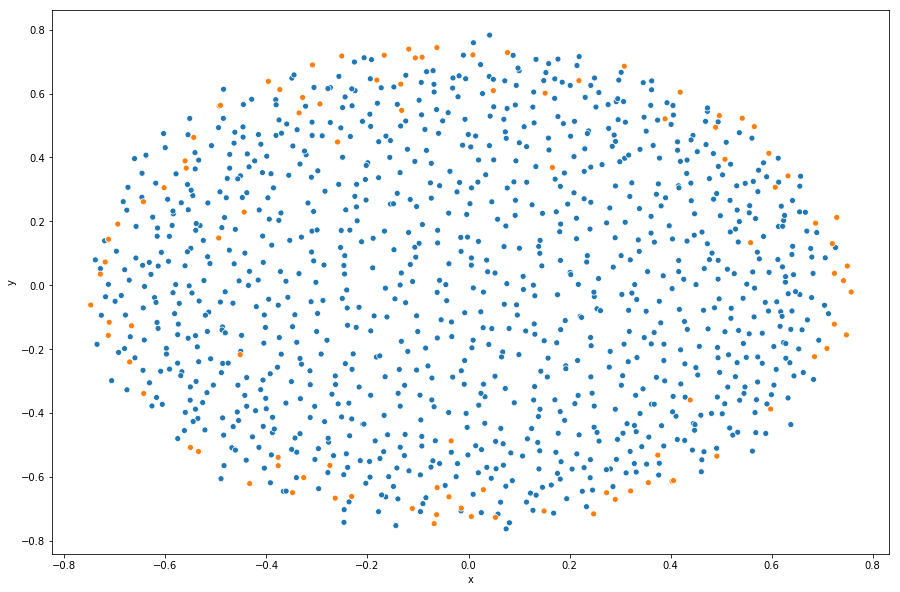

In [40]:
fig, ax = pyplot.subplots(figsize=(15,10))
p=seaborn.scatterplot(x="x",y="y",data=mds_frame,hue="active",legend=False, ax=ax)

In [49]:
gps_zinc = [list(map(float,(line.strip().split("\t")))) for line in open("../data/zinc1000.gps")]
gps_ar = [list(map(float,(line.strip().split("\t")))) for line in open("../data/ar100.gps")]

In [52]:
gps = [x for x in gps_zinc]
gps.extend([x for x in gps_ar])
gps_frame = pd.DataFrame(gps, columns=["gps1","gps2","gps3","gps4","gps5","gps6","gps7","gps8"])
gps_frame["active"] = [x > 999 for x,y in enumerate(gps)]

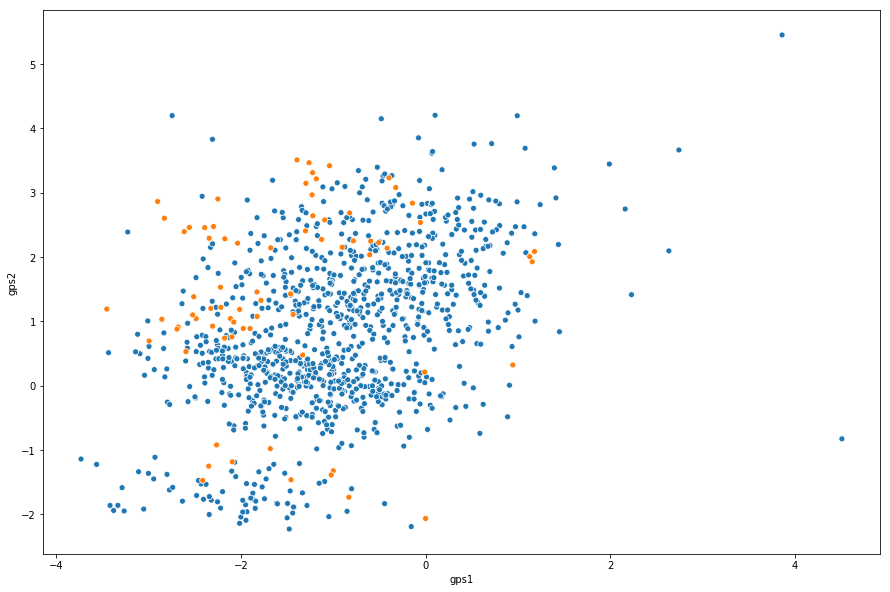

In [54]:
fig, ax = pyplot.subplots(figsize=(15,10))
p=seaborn.scatterplot(x="gps1",y="gps2",data=gps_frame,hue="active",legend=False, ax=ax)